In [1]:
from script_figure import AIC_length_model_OU as AIC_length_model
from script_figure import matrix_infered_OU as matrix_infered
from script_figure import plot_error_and_accuracy 
from script_figure import plot_error_dim_OU as plot_error_dim
import importlib, os
import _helper._load_csv as lcsv
import importlib
import SFFI.util_plot as ut 
import matplotlib.pyplot as plt
from script_figure import plot_trajectory as pt
from script_figure import labels_plot
from simulation_models import Ornstein_Uhlenbeck
import script_figure.helper_figure as hf
import matplotlib.gridspec as gridspec
from script_figure import plot_time_vs_key
import seaborn as sns 

lcsv.aggreagate_csv_from_cluster(select_file="Ornstein", path=os.path.abspath('') + "/csv")
model_class = Ornstein_Uhlenbeck.OrnsteinUhlenbeck

Look in  /home/andonis/These/Jupyter/PASTIS_PRL_github/csv
['lotka_volterra_dim_7_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_diffusion_strength.pkl', 'large_deviation_dim_8.pkl', 'large_deviation_dim_3.pkl', 'large_deviation_dim_6.pkl', 'OrnsteinUhlenbeck_dim_10_n.pkl', 'lotka_volterra_dim_7_benchmark_sindy_n.pkl', 'lorenz_critical_constant_noise_p_n.pkl', 'Misspecified_model_figure_1_diffusion_strength.pkl', 'lotka_volterra_dim_7_p_n.pkl', 'grayscott_dt.pkl', 'OrnsteinUhlenbeck_p_dim_10_n.pkl', 'grayscott_n.pkl', 'grayscott_p_n.pkl', 'grayscott_diffusion_strength.pkl', 'lorenz_critical_constant_noise_n.pkl', 'lorenz_critical_constant_noise_experimental_noise.pkl', 'lorenz_critical_constant_noise_diffusion_vs_time_diffusion_strength.pkl', 'lotka_volterra_dim_7_diffusion_strength.pkl', 'lorenz_critical_constant_noise_dt.pkl', 'large_deviation_dim_7.pkl', 'large_deviation_dim_9.pkl', 'large_deviation_dim_10.pkl', 'large_deviation_dim_5.pkl

[Errno 2] No such file or directory: 'OrnsteinUhlenbeck_dim_10_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/OrnsteinUhlenbeck_dim_10_n.pkl'
{'omega': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, -1.0, -1.0, 0.0, 1.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]], 'diffusion_constant': True, 'use_repulsive_gaussian': False, 'degree_polynome': 1, 'diffusion_strength': 100, 'dt': 0.01, 'n': 1000000, 'kwargs': {}}
index real base 19
total base 110
[Errno 2] No such file or directory: 'OrnsteinUhlenbeck_dim_10_n.pkl'
[Errno 2] No such file or directory:

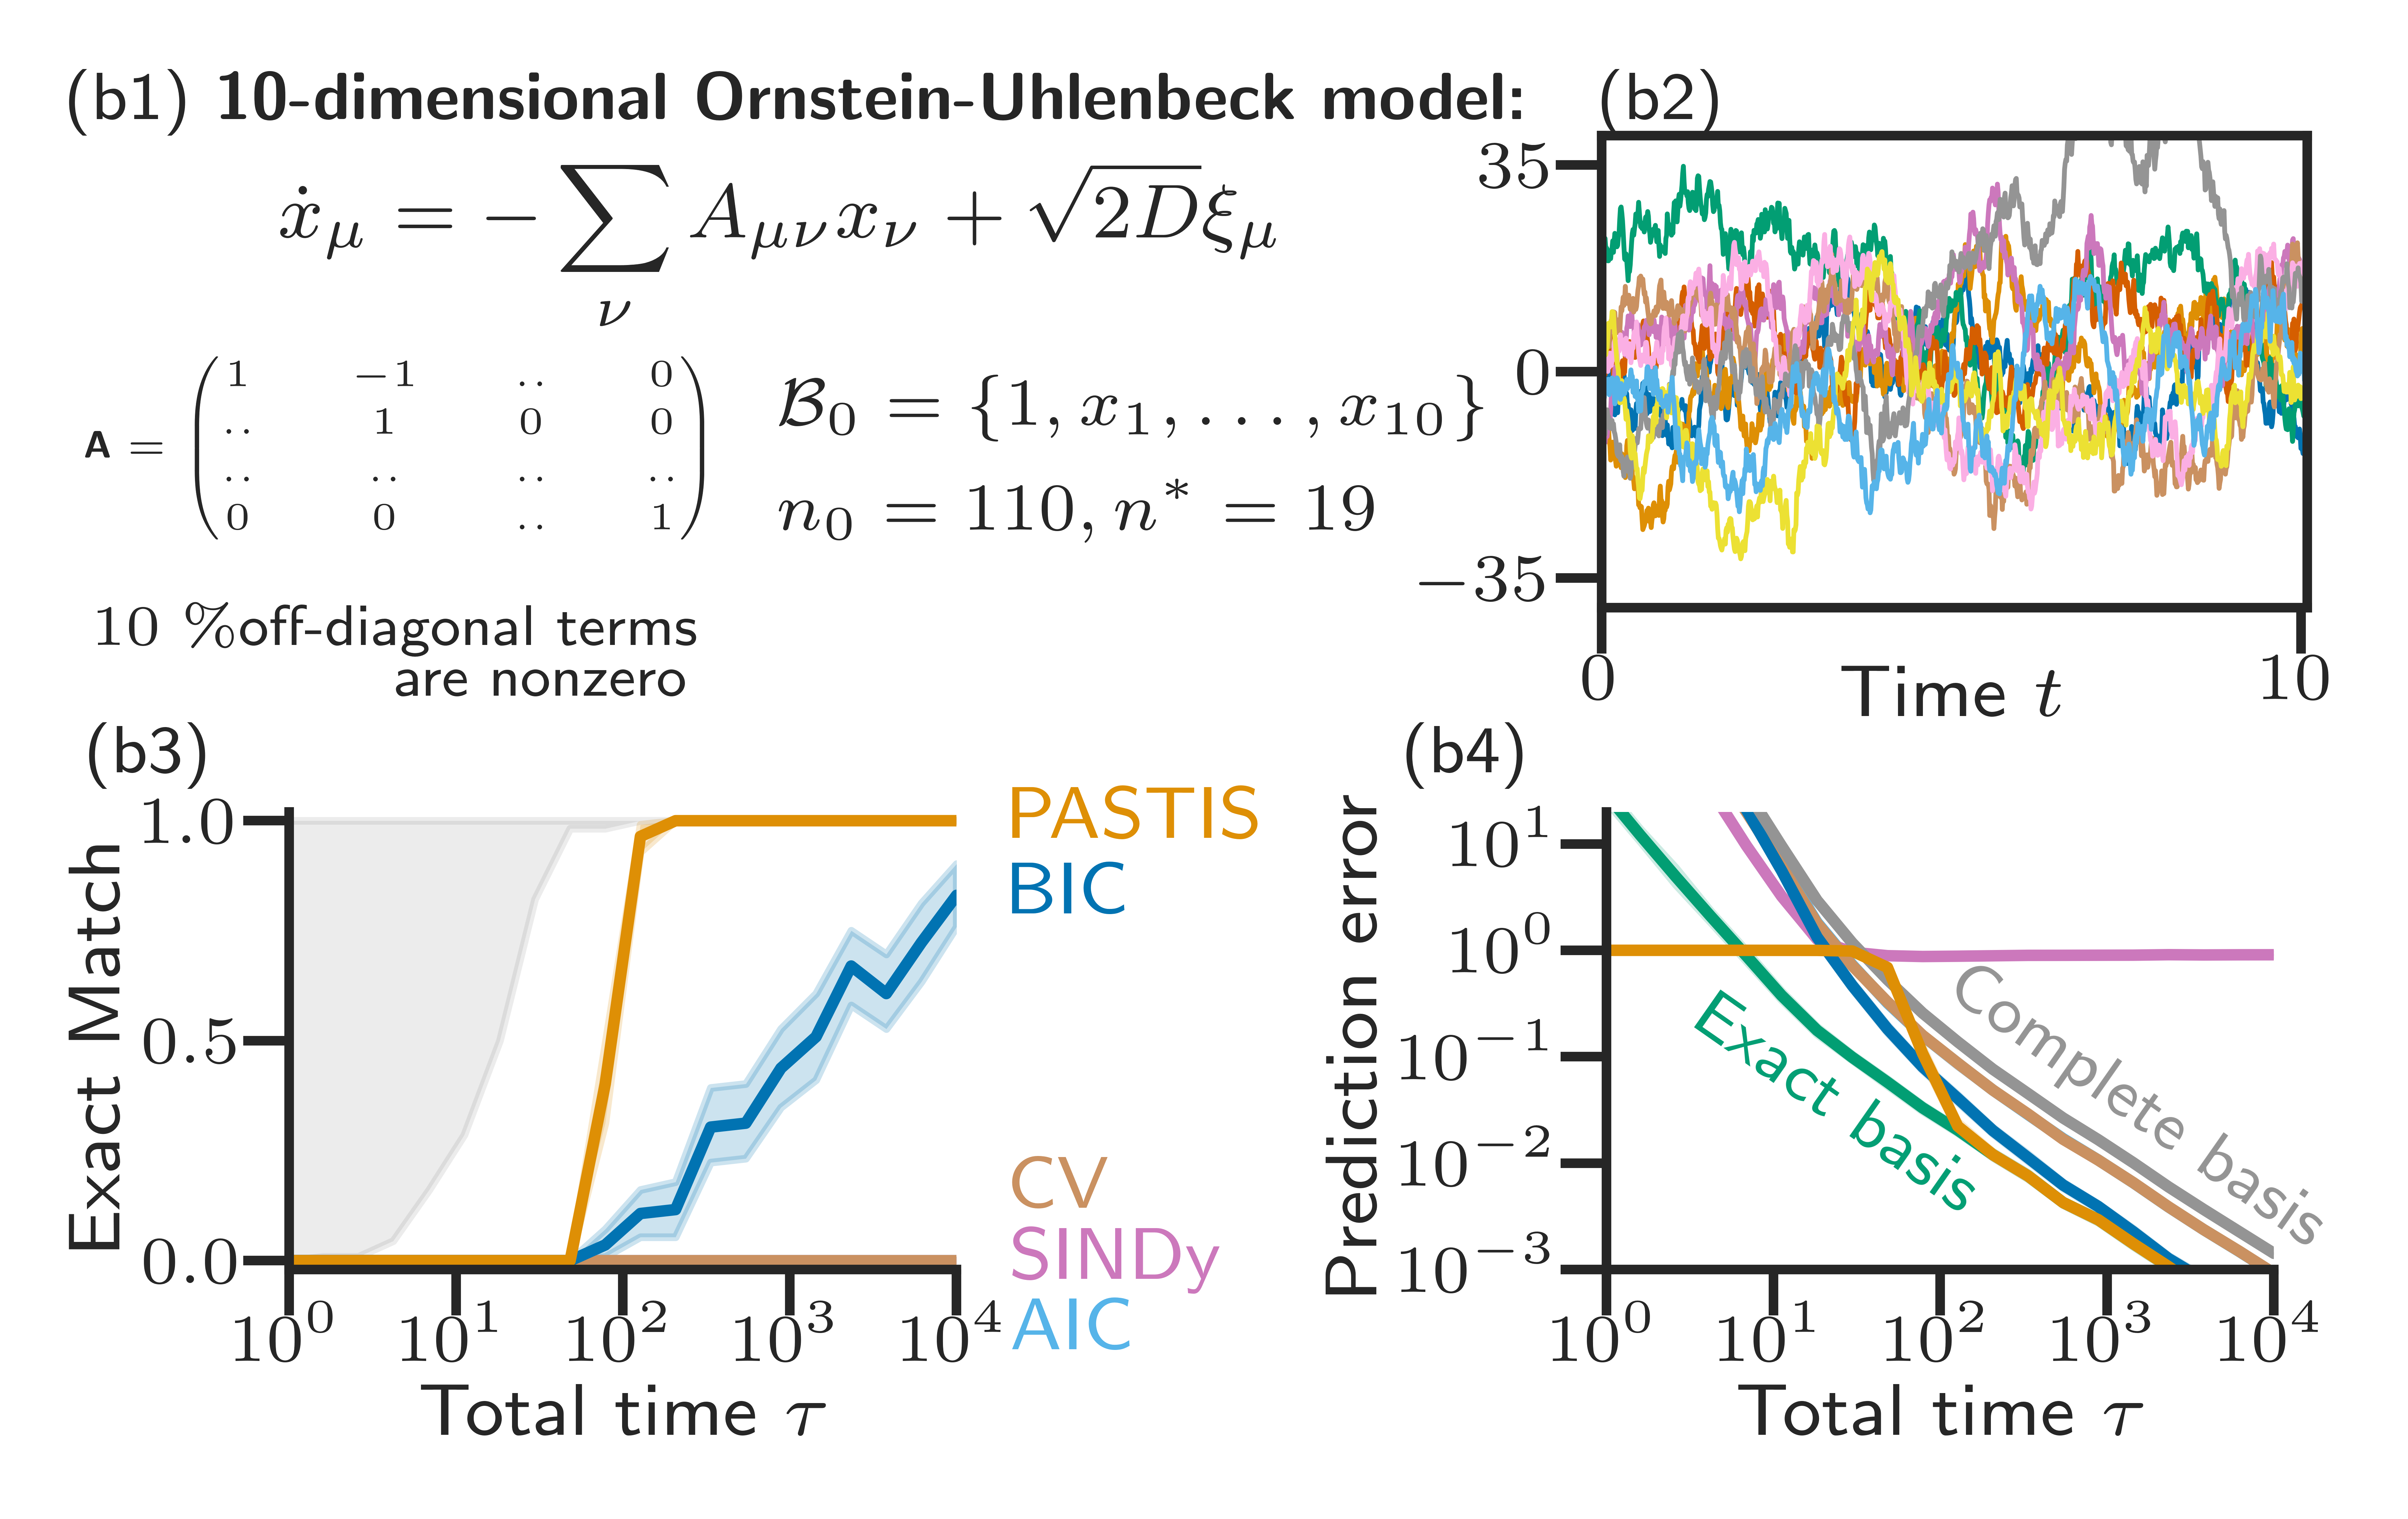

In [2]:
import numpy as np
importlib.reload(labels_plot)
ut.set_favorite_plot_config()

def plot_base(ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.axis('off')
    equation = r"$$\begin{aligned} \mathcal{B}_0 &= \left\{1, x_1, \dots, x_{%s}\right\}\end{aligned}$$"%dim
    #out = ax.text(0.05, 0.4, equation, fontsize=5, ha='left', va='bottom')
    ax.text(0, -0.1, equation, fontsize=7, ha='left', va='bottom', in_layout=False)
    equation = r"$n_0 = 110, n^* = 19$"
    ax.text(0, -0.7, equation, fontsize=7, ha='left', va='top', in_layout=False)
    return ax

def plot_equation_OU(ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    equation = r'''
    \begin{equation*} \dot{x}_\mu = -\sum_{\nu} A_{\mu \nu} x_\nu + \sqrt{2 D} \xi_\mu \end{equation*}
    '''
    out = ax.text(0, 1, equation, fontsize=8, ha='left', va='top', in_layout=False)
    ax.axis('off')
    return ax

def plot_matrix_OU(ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    equation = r'''
    \begin{equation*} \textbf{A} = \begin{pmatrix} 1 &-1&..& 0 \\ ..&1&0&0 \\ ..&..&..&.. \\ 0&0&..& 1 \end{pmatrix} \end{equation*} 
    '''
    # Display the LaTeX equation
    out = ax.text(0, 1.5, equation, fontsize=4, ha='left', va='top', in_layout=False)
    equation = r"$10~\% \text{off-diagonal terms}$"
    ax.text(0, -0.4, equation, fontsize=6, ha='left', va='bottom', in_layout=False)
    ax.text(0, -0.6, r"$\text{are nonzero}$", fontsize=6, ha='left', va='bottom', in_layout=False)
    ax.axis('off')
    return ax

ut.set_favorite_plot_config()
name_csv = "OrnsteinUhlenbeck_dim"
dim = 10
name_csv_time = "{}_{}_n.pkl".format(name_csv, dim)
method_to_plot = ["AIC",  "BIC",  "SINDy",# r"$\text{PASTIS}_p$",
                  "PASTIS", "CV"]
l_y_plot = ["Exact_model_found"]

fig = plt.figure(figsize=ut.set_size(width="article", fraction=1, subplots=(1, 1)), layout='constrained')

gs0 = gridspec.GridSpec(2, 1, figure=fig)
gs00 = gridspec.GridSpecFromSubplotSpec(2, 11, subplot_spec=gs0[0])
gs01 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[1])

ax_equation = fig.add_subplot(gs00[0, :4])
ax_matrix =  fig.add_subplot(gs00[1, :4])
ax_base = fig.add_subplot(gs00[0, 4:7])

ax_trajectory = fig.add_subplot(gs00[:, 7:])

ax_time_accu = fig.add_subplot(gs01[0, 0])
ax_time_error = fig.add_subplot(gs01[0, 1])
#ax_dim = fig.add_subplot(gs01[0, 1])

plot_equation_OU(ax_equation)
plot_matrix_OU(ax_matrix)
plot_base(ax_base)

model_class.rng = np.random.default_rng(0)
pt.plot_trajectory_Lotka_Volterra_simple(name_csv_time, model_class, ax=ax_trajectory, parameter="time", parameters_value_plot=[10], lw=0.5, max_time=10.1)
ax_trajectory.set_xlabel("Time $t$", labelpad=-5)
max_y = 40
ax_trajectory.set_yticks([-max_y+5, 0, max_y-5])
ax_trajectory.set_ylim(-max_y, max_y)

plot_error_and_accuracy.plot_from_csv(name_csv_time, 
                                  parameter="time",
                                  method_to_plot=method_to_plot,
                                  l_y_plot=["Exact_model_found"],
                                  axs=[ax_time_accu],
                                  add_legend_on_line=True,
                                  verbose=True
                                  )
#ax_time_accu.legend().remove()
ax_time_accu.spines['top'].set_visible(False)
ax_time_accu.spines['right'].set_visible(False)
plot_error_and_accuracy.add_pareto_zone(ax_time_accu, name_csv_time, two_zone_plot=False)
ax_time_accu.set_xticks([10**0, 10**1, 10**2, 10**3, 10**4])

plot_error_and_accuracy.plot_from_csv(name_csv_time, 
                                  parameter="time",
                                  method_to_plot=method_to_plot + ["Complete basis", "Exact basis"],
                                  l_y_plot=["predictive_error"],
                                  axs=[ax_time_error],
                                  add_legend_on_line=False,
                                  )
ax_time_error.legend().remove()
sns.despine(ax=ax_time_error)
ax_time_error.set_xticks([10**0, 10**1, 10**2, 10**3, 10**4])
ax_time_error.set_yticks([10**(-4), 10**(-3), 10**(-2), 10**(-1), 10**0, 10**1, 10**2])
ax_time_error.set_ylim(top=20, bottom=10**(-3))
ax_time_error.text(100, 0.3, "Complete basis", fontsize=7, ha='left', va='bottom', rotation=-35, rotation_mode='anchor', color=labels_plot.color_dict_name_to_color["Complete basis"])
ax_time_error.text(3, 0.15, "Exact basis", fontsize=7, ha='left', va='bottom', rotation=-35, rotation_mode='anchor', color=labels_plot.color_dict_name_to_color["Exact basis"])


# percent_accept = 0.9
# name_csv_dim = name_csv.replace("_dim", "")
# plot_time_vs_key.plot_time_vs_key(name_csv=name_csv_dim, parameter="dim",
#                                   ax=ax_dim, percent_accept=percent_accept, accuracy="Exact_model_found",
#                                   method_to_plot=method_to_plot,#[x for x in method_to_plot if "model" not in x],
#                                   aggregate_csv=True, xscale="linear", move_legend=False, ms=8, lw=2, markeredgewidth=0)
# plot_time_vs_key.add_Pareto_front(ax_dim, name_csv=name_csv_dim, fontsize=8,
#                                   method="PASTIS", percent_accept=percent_accept)
# ax_dim.set_xlim(2,10)
# ax_dim.set_xticks([2, 4, 6, 8, 10])
# ax_dim.legend().remove()
# ax_dim.spines['top'].set_visible(False)
# ax_dim.spines['right'].set_visible(False)

hf.add_letter(ax_equation, "b1", x=0, y=1, title = "%s-dimensional Ornstein-Uhlenbeck model: "%dim)
out = hf.add_letter(ax_trajectory, "b2", y=1, x=0)
out.set_in_layout(True)

hf.add_letter(ax_time_accu, "b3")
#hf.add_letter(ax_dim, "b4")
hf.add_letter(ax_time_error, "b4")

plt.figure(1).axes[0].texts[0].set(position=(0.2991, 1.349))
plt.figure(1).axes[1].texts[0].set(position=(0.0227, 1.712))
plt.figure(1).axes[1].texts[1].set(position=(0.0404, -0.273))
plt.figure(1).axes[1].texts[2].set(position=(0.4629, -0.5577), text='$\\text{are nonzero}$')
plt.figure(1).axes[2].texts[0].set(position=(-0.101, -0.7129))
plt.figure(1).axes[2].texts[1].set(position=(-0.101, -0.9212))

plt.savefig("figures/OU_square.png", bbox_inches='tight')